In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qcodes as qc
from qcodes.instrument_drivers.nplab_drivers.Keithley_2182a import Keithley_2182a
from qcodes.instrument_drivers.nplab_drivers.Keithley_6221 import Keithley_6221
import time

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
k6 = Keithley_6221('k6', 'GPIB::12::INSTR')

Connected to: KEITHLEY INSTRUMENTS INC. 6221 (serial:4307474, firmware:D03  /700x) in 0.15s


In [7]:
print(k6.ask('SOUR:DELT:NVPR?'))
print(k6.ask('sour:delt:coun?'))
print(k6.ask('sour:swe:coun?'))

1
1000
1


# Test of the simple delta mode at one current through 10 $\Omega$ Resistor

In [49]:
currval = 10e-9
delay = 1
numpoints = 100

In [50]:
k6.write('SOUR:DELT:HIGH '+str(currval))
k6.write('SOUR:DELT:DEL '+str(delay))
k6.write('SOUR:DELT:COUN '+str(numpoints))
#k6.write('SOUR:DELT:CAB ON')
k6.write('TRAC:POIN '+str(numpoints))
k6.write('SOUR:DELT:ARM')
k6.write('INIT:IMM')

In [51]:
k6.write('SOUR:SWE:ABOR')
data3 = k6.ask('TRAC:DATA?')

# This is the basic setup

In [38]:
darray = np.fromstring(data, sep=',')

In [39]:
vals = np.zeros(int(len(darray)/2))
times = np.zeros(int(len(darray)/2))
for i in range(len(darray)):
    if np.mod(i,2) == 0:
        vals[int(i/2)] = darray[i]
    else:
        times[int(i/2.-0.5)] = darray[i]

# Some tests

With current at 1 $mA$, delay 1 s

Standard deviation: 5.298319529809247e-08 V


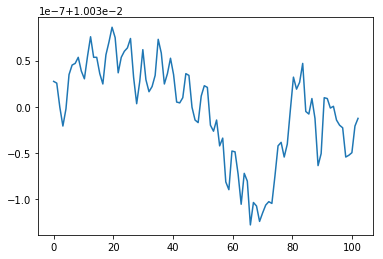

In [44]:
plt.plot(times, vals)
print('Standard deviation: {} V'.format(np.std(vals)))

With current at 10 $\mu A$, delay 1 s

Standard deviation: 2.3099753759421152e-08 V


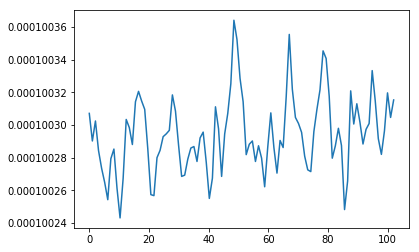

In [47]:
darray2 = np.fromstring(data2, sep=',')
vals2 = np.zeros(int(len(darray2)/2))
times2 = np.zeros(int(len(darray2)/2))
for i in range(len(darray2)):
    if np.mod(i,2) == 0:
        vals2[int(i/2)] = darray2[i]
    else:
        times2[int(i/2.-0.5)] = darray2[i]
plt.plot(times2, vals2)
print('Standard deviation: {} V'.format(np.std(vals2)))

With current at 10 $n A$, delay 1s

Standard deviation: 2.047388738383433e-08 V


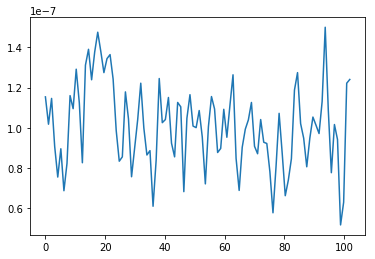

In [52]:
darray3 = np.fromstring(data3, sep=',')
vals3 = np.zeros(int(len(darray3)/2))
times3 = np.zeros(int(len(darray3)/2))
for i in range(len(darray3)):
    if np.mod(i,2) == 0:
        vals3[int(i/2)] = darray3[i]
    else:
        times3[int(i/2.-0.5)] = darray3[i]
plt.plot(times3, vals3)
print('Standard deviation: {} V'.format(np.std(vals3)))

Export values to compare to when Delta mode is not used

In [57]:
d1 = np.column_stack((times, vals))
d2 = np.column_stack((times2, vals2))
d3 = np.column_stack((times3, vals3))

In [58]:
np.savetxt('1mAdelta', d1)
np.savetxt('10uAdelta', d2)
np.savetxt('10nAdelta', d3)